In [28]:
## import all the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression



In [29]:
#import dataset
df = pd.read_csv("C:/Users/nora_/OneDrive/NORA/DATASCIENCE BOOTCAMP/Flight Data.csv")

                 

In [18]:
#visualise five first lines of the ED with header
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [30]:
#check the type of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [31]:
#check if there are values missing
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [32]:
#list the descriptive stats for each of the columns
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


Text(0.5, 1.0, 'Impact of wind speed on departure delay')

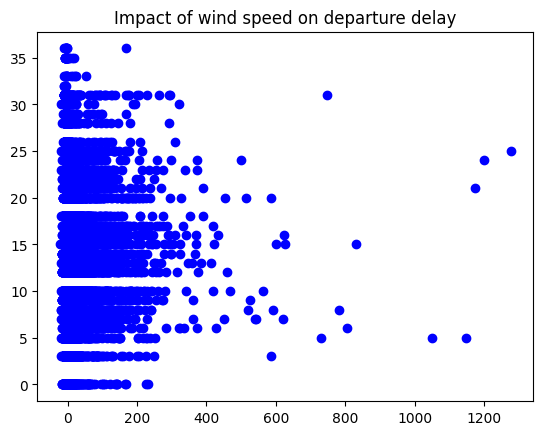

In [33]:
## create a scatterplot showing the relationship between wind speed and departure delay
x = df["DEP_DELAY"]
y = df["Wind Speed"]
plt.scatter(x, y, color = 'blue', alpha = 1)
plt.title("Impact of wind speed on departure delay")


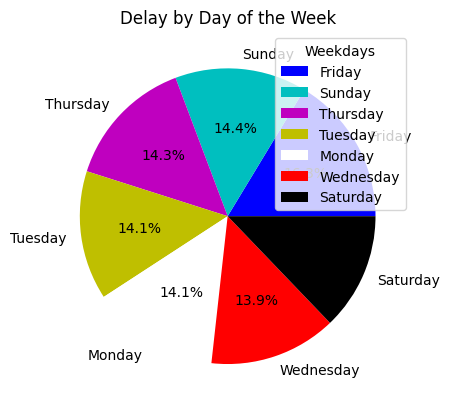

In [34]:
#create a pie chart to show the flight delays by day of the week
weekdays = df["DAY_OF_WEEK"]

weekday_mapping = {
    1: "Monday", 
    2: "Tuesday", 
    3: "Wednesday", 
    4: "Thursday", 
    5: "Friday", 
    6: "Saturday", 
    7: "Sunday"
}


weekdays = df["DAY_OF_WEEK"].map(weekday_mapping)

weekdays_counts = weekdays.value_counts()
mycolors = ["b", "c", "m", "y", "w", "r", "k"]

# Count occurrences of each weekday
weekdays_counts = weekdays.value_counts()

plt.pie(weekdays_counts, labels=weekdays_counts.index, autopct='%1.1f%%', colors = mycolors)

plt.title("Delay by Day of the Week")
plt.legend(weekdays_counts.index, title="Weekdays")
plt.show()

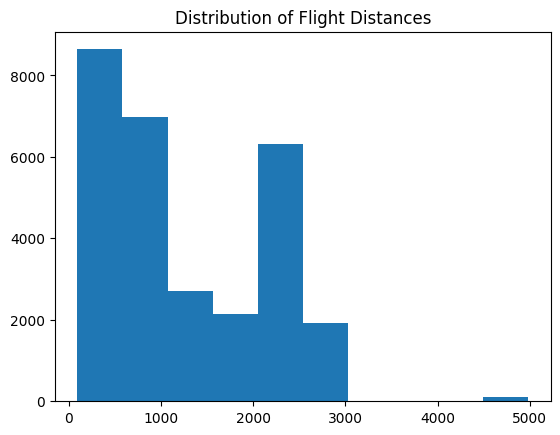

In [35]:
#create a histogram to show the distribution of flight distances
m = df["DISTANCE"]
plt.hist(m)
plt.title("Distribution of Flight Distances")
plt.show() 

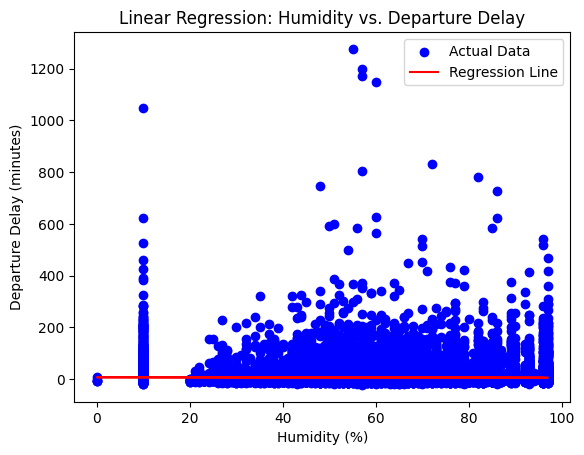

In [36]:
## implement linear regression model for humidity on departure delay
X = df[['Humidity']]
y = df['DEP_DELAY']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label="Actual Data")  
plt.plot(X, y_pred, color='red', label="Regression Line") 
plt.xlabel("Humidity (%)")
plt.ylabel("Departure Delay (minutes)")
plt.title("Linear Regression: Humidity vs. Departure Delay")
plt.legend()
plt.show()